
# 🌳 Decision Tree & Random Forest

# 1. Decision Tree

<div style="text-align: center;">
    <img src="./photo/Decision_Tree.png" alt="Capture.PNG" width="500" />
</div>


# 2. Random Forest

<div style="text-align: center;">
    <img src="./photo/random_forest.jpeg" alt="Capture.PNG" width="500" />
</div>

### Decision Tree

In [18]:
pip install scikit-learn pandas matplotlib seaborn datasets

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [20]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to a DataFrame for better visualization
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Display the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [21]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

from sklearn.model_selection import train_test_split

#Split data into features (X) and labels (y)
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DataFrames for better visualization
train_df = pd.DataFrame(X_train, columns=iris.feature_names)
train_df['species'] = y_train
test_df = pd.DataFrame(X_test, columns=iris.feature_names)
test_df['species'] = y_test

# Display the training and testing sets
print("Training Set:")
print(train_df.head())
print("\nTesting Set:")
print(test_df.head())

Training Set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.6               3.6                1.0               0.2   
1                5.7               4.4                1.5               0.4   
2                6.7               3.1                4.4               1.4   
3                4.8               3.4                1.6               0.2   
4                4.4               3.2                1.3               0.2   

   species  
0        0  
1        0  
2        1  
3        0  
4        0  

Testing Set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.1               2.8                4.7               1.2   
1                5.7               3.8                1.7               0.3   
2                7.7               2.6                6.9               2.3   
3                6.0               2.9                4.5               1.5   
4                6.8    

/home/hmuegyi/Desktop/git_project/AI_2026/Day5/machine_learning_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 150/150 [00:00<00:00, 30837.45 examples/s]


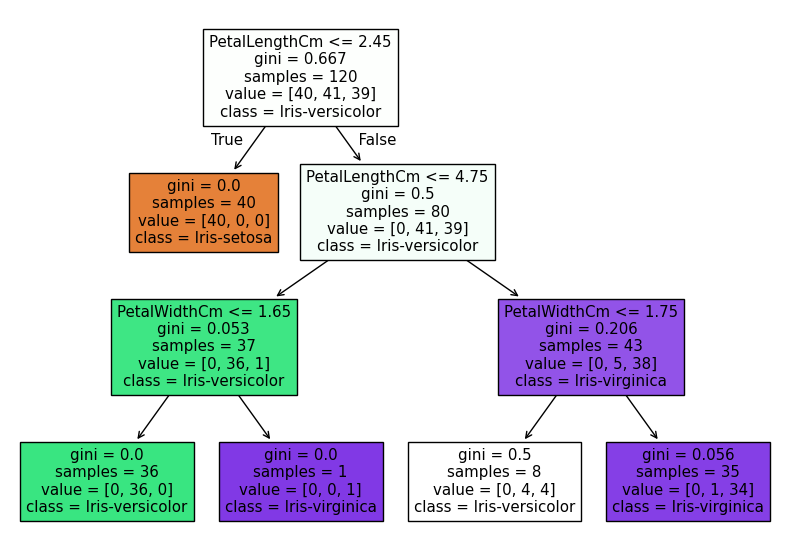

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset from Hugging Face
#lesson6.py
from datasets import load_dataset
iris_dataset = load_dataset("scikit-learn/iris", split="train")

# Convert to pandas and prepare features and labels
iris_df = iris_dataset.to_pandas()
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_df[feature_columns].values
y = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(10, 7))
plot_tree(model,
feature_names=feature_columns,
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
filled=True)
plt.show()

Decision Tree Accuracy: 1.0


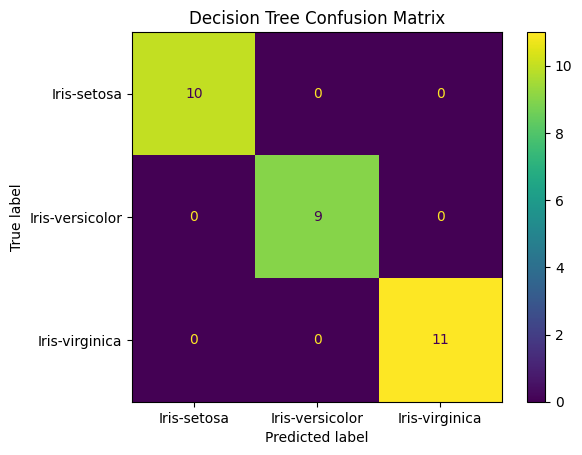

In [27]:
# Evaluate Decision Tree model
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Predict on the test set
y_pred_dt = model.predict(X_test)

# Compute accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_dt,
    display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    cmap='viridis'
)
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Random Forest

In [19]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [26]:
#Load the Iris dataset
iris = load_iris()
# Explore the dataset

print("\nFeature Names:\n", iris.feature_names)  # Feature names
print("\nTarget Names:\n", iris.target_names)  # Target names
print("\nData Shape:", iris.data.shape)  # Shape of features (rows, columns)
print("\nSample Features:\n", iris.data[:5])  # First 5 rows of features
print("\nSample Labels:\n", iris.target[:5])  # First 5 labels



Feature Names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names:
 ['setosa' 'versicolor' 'virginica']

Data Shape: (150, 4)

Sample Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Sample Labels:
 [0 0 0 0 0]


In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Split the dataset into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, test_size=0.2, random_state=42
)
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (120, 4)
Testing Set Shape: (30, 4)


In [22]:
# Train the model using the training data

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



Model Accuracy: 1.0


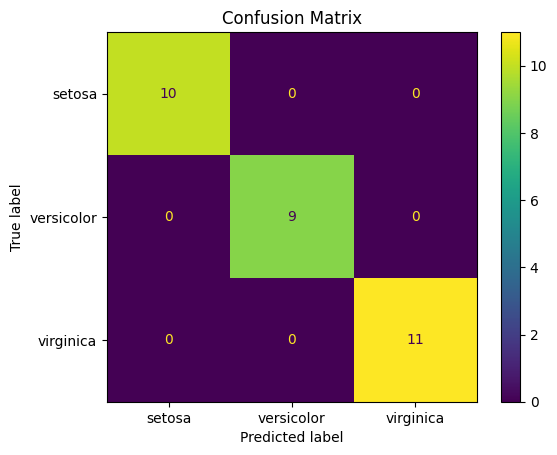

In [23]:
#Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(
model, X_test, y_test, display_labels=iris.target_names, cmap="viridis"
)
plt.title("Confusion Matrix")
plt.show()

### compare feature important

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize and Train the models
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 2. Extract and format Feature Importances
feat_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

fi = pd.DataFrame({
    'feature': feat_names,
    'decision_tree': dt.feature_importances_,
    'random_forest': rf.feature_importances_
})

# 3. Print the results sorted by Random Forest importance
print('Feature importances:')
print(fi.sort_values('random_forest', ascending=False))

Feature importances:
             feature  decision_tree  random_forest
2  petal length (cm)       0.934626       0.439994
3   petal width (cm)       0.065374       0.421522
0  sepal length (cm)       0.000000       0.108098
1   sepal width (cm)       0.000000       0.030387
